In [2]:
import sys 
sys.path.append('../../')

In [3]:
import os
from src.llm_reviewer.notebook_reviewer import IssueLevel

service_account_path = "creds/google__sa.json"
tracking_sheet_id = "1qBU7Kvuuij2fxbqPxebReKMxWgIBmOIE5Gi4ZuX0j_4"
delivery_sheet_id = "1eUif5I8xhHU8fY0X9v8r2JI9hWPh7Dq_9VXpSIHwww4"

ISSUE_LEVEL = IssueLevel.MEDIUM
DATA_DIR = 'data/03_01_2024/'

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [1]:
import pandas as pd

from src.sheets_utils import download_sheet_as_df


contributors_df = download_sheet_as_df(
    service_account_path,
    tracking_sheet_id,
    "Contributors"
)

tasks_sheets_df = pd.concat(
    [
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_2"
        ),
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_3"
        ),
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_4"
        ),
        download_sheet_as_df(
            service_account_path,
            tracking_sheet_id,
            "Conversations_Batch_5"
        ),
    ],
    ignore_index=True
)

tasks_sheets_df["completion_date"] = pd.to_datetime(tasks_sheets_df["completion_date"], format="mixed").dt.date
tasks_sheets_df

ModuleNotFoundError: No module named 'src'

In [3]:
old = tasks_sheets_df.copy()#df[df["completion_date"] <= pd.to_datetime("2023/12/27").date()]
old_completed = old[old["completion_status"] == "Done"]
old_completed

,task_link,metadata__topic,assigned_to_email,completion_status,modified_question?,duration_mins,completion_date,comments,metadata__problem_type,metadata__target_length,review_status,reviewer_email,Team_Type(Internal/External),metadata__type,modified_question
0,https://colab.research.google.com/drive/10cwJG...,python_language_and_scripting > functions_and_...,lucas.k@turing.com,Done,FALSE,13,2023-12-21,,query,1,done,test,External,NaN,NaN
1,https://colab.research.google.com/drive/16dCMc...,unit_testing_methodology > test_driven_develop...,ruturaj.m@turing.com,Done,TRUE,15,2023-12-21,,query,1,,,External,NaN,NaN
2,https://colab.research.google.com/drive/17KaqC...,python_language_and_scripting > decorators,ruturaj.m@turing.com,Done,FALSE,10,2023-12-21,,query,1,,,External,NaN,NaN
3,https://colab.research.google.com/drive/17mMiU...,algorithms > by_topic > bit_manipulation,daniel.oluwakayode-c@turing.com,Done,FALSE,20,2023-12-20,,query,1,,,External,NaN,NaN
4,https://colab.research.google.com/drive/18nl4l...,python_language_and_scripting > decorators,ruturaj.m@turing.com,Done,FALSE,10,2023-12-21,,modification,1,,,External,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,https://colab.research.google.com/drive/14ga5S...,First_Timer_General_coding_help_Explain_comple...,archit.k@turing.com,Done,NaN,35,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2583,https://colab.research.google.com/drive/1tqU85...,First_Timer_General_coding_help_Refactor_code_...,archit.k@turing.com,Done,NaN,25,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2585,https://colab.research.google.com/drive/1x0T4S...,First_Timer_General_coding_help_Refactor_code_...,archit.k@turing.com,Done,NaN,40,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2656,https://colab.research.google.com/drive/1BnBJH...,Intermediate_General_coding_help_Do_a_code_rev...,archit.k@turing.com,Done,NaN,45,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE


In [4]:
delivered_df = pd.concat(
    [
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 1"
        ),
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 2"
        ),
        download_sheet_as_df(
            service_account_path,
            delivery_sheet_id,
            "Batch 3"
        ),
    ],
    ignore_index=True
)
delivered_df

,task_link,metadata__topic,duration_mins,number_of_turns,jsonl_link
0,https://colab.research.google.com/drive/1X4H8L...,algorithms > by_data_structure > strings,119,6,https://drive.google.com/file/d/1cAGKy7u_sYzZW...
1,https://colab.research.google.com/drive/1G_d7Z...,algorithms > by_data_structure > strings,60,3,https://drive.google.com/file/d/1ql2hECkLQG3pI...
2,https://colab.research.google.com/drive/1vYEPg...,algorithms > by_data_structure > strings,50,3,https://drive.google.com/file/d/1YMkZcyiEqpqo3...
3,https://colab.research.google.com/drive/1_arMF...,algorithms > by_topic > divide_and_conquer,10,1,https://drive.google.com/file/d/1Z2bdCHcRWyr6k...
4,https://colab.research.google.com/drive/10Ahc4...,algorithms > by_topic > divide_and_conquer,10,1,https://drive.google.com/file/d/1n7v8gQtsbwrbB...
...,...,...,...,...,...
1442,https://colab.research.google.com/drive/1Owlkj...,everyday_use_cases,15,2,https://drive.google.com/file/d/128oU9I9eW7cV8...
1443,https://colab.research.google.com/drive/1m9Ti2...,everyday_use_cases,60,3,https://drive.google.com/file/d/1Ni1pDcU6uHE31...
1444,https://colab.research.google.com/drive/1J3EkE...,deep_learning > convolutional_neural_networks,60,4,https://drive.google.com/file/d/1Scb-bjq3pB4VP...
1445,https://colab.research.google.com/drive/1FVFH6...,algorithms > by_topic > famous_algorithms,40,2,https://drive.google.com/file/d/1fLo_8NxsUg5PY...


In [5]:
def fix_task_link(row):
    if isinstance(row["task_link"], float) and pd.isna(row["task_link"]):
        row["task_link"] = row["#REF!"]
    return row

undelivered_old = old_completed[~old_completed["task_link"].isin(delivered_df["task_link"])]
try:
    undelivered_old = undelivered_old.apply(fix_task_link, axis=1)
except KeyError:
    pass
undelivered_old

,task_link,metadata__topic,assigned_to_email,completion_status,modified_question?,duration_mins,completion_date,comments,metadata__problem_type,metadata__target_length,review_status,reviewer_email,Team_Type(Internal/External),metadata__type,modified_question
107,https://colab.research.google.com/drive/1uSdqT...,algorithms > by_data_structure > advanced_data...,pedro.teche@turing.com,Done,FALSE,20,2023-12-20,,modification,1,,,Internal,NaN,NaN
193,https://colab.research.google.com/drive/1cP6qz...,unit_testing_methodology > test_ai_and_ml_models,patelia.a@turing.com,Done,FALSE,,NaT,,modification,1,,,External,NaN,NaN
194,https://colab.research.google.com/drive/1dZpsB...,python_language_and_scripting > advanced_netwo...,patelia.a@turing.com,Done,FALSE,,NaT,,modification,1,,,External,NaN,NaN
195,https://colab.research.google.com/drive/1F9fLi...,unit_testing_methodology > testing_database_in...,stefano.b@turing.com,Done,TRUE,,NaT,question modified to make it clear it's a data...,query,1,,,External,NaN,NaN
308,https://colab.research.google.com/drive/1lHYB-...,algorithms > by_data_structure > trees,marcus.a@turing.com,Done,FALSE,20,2023-12-22,,NaN,2+,test,test,NaN,modification,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,https://colab.research.google.com/drive/14ga5S...,First_Timer_General_coding_help_Explain_comple...,archit.k@turing.com,Done,NaN,35,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2583,https://colab.research.google.com/drive/1tqU85...,First_Timer_General_coding_help_Refactor_code_...,archit.k@turing.com,Done,NaN,25,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2585,https://colab.research.google.com/drive/1x0T4S...,First_Timer_General_coding_help_Refactor_code_...,archit.k@turing.com,Done,NaN,40,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE
2656,https://colab.research.google.com/drive/1BnBJH...,Intermediate_General_coding_help_Do_a_code_rev...,archit.k@turing.com,Done,NaN,45,2024-01-03,None,NaN,None,None,None,NaN,None,FALSE


In [6]:
import io
import pickle
import nbformat

from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload



def download_and_parse_notebook(service_account_file, file_id):
    # Authenticate with the service account
    credentials = service_account.Credentials.from_service_account_file(
        service_account_file, scopes=['https://www.googleapis.com/auth/drive'])
    service = build('drive', 'v3', credentials=credentials)

    # Request to download the file
    request = service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)

    # Download the file
    done = False
    while not done:
        status, done = downloader.next_chunk()
        print("Download progress: %d%%." % int(status.progress() * 100))

    # Move the buffer's pointer to the beginning
    fh.seek(0)

    # Open the notebook
    nb_parsed_notebook = nbformat.read(fh, as_version=4)

    return {'file_id': file_id, 'nb_parsed_notebook': nb_parsed_notebook}


def threading_processor(service_account_path, file_id, results):
    results.append(download_and_parse_notebook(service_account_path, file_id))


df = undelivered_old

threads = []
from concurrent.futures import ThreadPoolExecutor

def get_file_id_from_task_link(task_link):
    try:
        return task_link.split("/")[-1]
    except Exception as e:
        print('ERROR' + '='*60)
        print(task_link)
        return None

file_ids = df["task_link"].apply(get_file_id_from_task_link).dropna().tolist()
parsed_conversations = []

with ThreadPoolExecutor(max_workers=20) as executor:
    futures = [executor.submit(download_and_parse_notebook, service_account_path, file_id) for file_id in file_ids]
    for future in futures:
        try:
            result = future.result()
            parsed_conversations.append(result)
        except Exception as e:
            print(f"Failed to download and parse notebook: {e}")


with open(DATA_DIR + 'parsed_conversations.pkl', 'wb') as f:
    pickle.dump(parsed_conversations, f)

with open(DATA_DIR + 'parsed_conversations.pkl', 'rb') as f:
    parsed_conversations = pickle.load(f)

Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Failed to download and parse notebook: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/1lHYB-8JiU67LlaqjvaRuLYUbetxWbnD5%23scrollTo%3DvzyhtIq2Tt8Q?alt=media returned "File not found: 1lHYB-8JiU67LlaqjvaRuLYUbetxWbnD5#scrollTo=vzyhtIq2Tt8Q.". Details: "[{'message': 'File not found: 1lHYB-8JiU67LlaqjvaRuLYUbetxWbnD5#scrollTo=vzyhtIq2Tt8Q.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">
Failed to download and parse notebook: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/1rfNQU__74pEdovonm_-u6yrhF0UsAa2C?alt=media returned "File not found: 1rfNQU__74pEdovonm_-u6yrhF0UsAa2C.". Details: "[{'message': 'File not found: 1rfNQU__74pEdovonm_-u6yrhF0UsAa2C.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}

/home/joe96/projects/turing/character.ai/character_tasks/venv/lib/python3.9/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.
Download progress: 100%.


In [7]:
import pickle


with open(DATA_DIR + 'parsed_conversations.pkl', 'rb') as f:
    parsed_conversations = pickle.load(f)
    
from src.llm_reviewer.notebook_reviewer import review_notebooks

OFFSET = 0
notebooks = parsed_conversations

import os

batch_size = 30
total_notebooks = len(notebooks)
reviews_pkl_folder = DATA_DIR + 'raw_reviews_pkls/'
os.makedirs(reviews_pkl_folder, exist_ok=True)

for i in range(OFFSET, total_notebooks, batch_size):
    batch_notebooks = notebooks[i:i+batch_size]
    print(f"Reviewing notebooks {i+1} to {min(i+batch_size, total_notebooks)} out of {total_notebooks}")
    batch_reviews = review_notebooks(batch_notebooks, max_threads_per_notebook=6, max_concurrent_notebooks=16)
    batch_file_name = f'review_results{i+1}-{min(i+batch_size, total_notebooks)}.pkl'
    batch_file_path = os.path.join(reviews_pkl_folder, batch_file_name)
    with open(batch_file_path, 'wb') as f:
        pickle.dump(batch_reviews, f)

Reviewing notebooks 1 to 30 out of 592
Reviews done: 0, Reviews left after this one: 3
Reviews done: 0, Reviews left after this one: 1
Reviews done: 0, Reviews left after this one: 5
Reviews done: 0, Reviews left after this one: 3
Reviews done: 0, Reviews left after this one: 4
Reviews done: 0, Reviews left after this one: 3
Reviews done: 0, Reviews left after this one: 3
Reviews done: 0, Reviews left after this one: 5
Reviews done: 0, Reviews left after this one: 2
Reviews done: 0, Reviews left after this one: 3
Reviews done: 0, Reviews left after this one: 2
Reviews done: 0, Reviews left after this one: 4
Reviews done: 0, Reviews left after this one: 1
Reviews done: 0, Reviews left after this one: 0
Reviews done: 0, Reviews left after this one: 2
Reviews done: 0, Reviews left after this one: 1
Reviews done: 0, Reviews left after this one: 3
Reviews done: 0, Reviews left after this one: 1
Reviews done: 0, Reviews left after this one: 1
Reviews done: 0, Reviews left after this one: 0
R

In [2]:
from src.llm_reviewer.notebook_reviewer import notebook_reviews_to_df

import pickle
import glob

review_files = glob.glob(DATA_DIR + 'raw_reviews_pkls/*.pkl')
reviews = []
for file_path in review_files:
    with open(file_path, 'rb') as f:
        reviews.extend(pickle.load(f))

seen_paths = set()
deduped_reviews = []
for review in reversed(reviews):
    if review is not None and review['nb_path'] not in seen_paths:
        seen_paths.add(review['nb_path'])
        deduped_reviews.append(review)
reviews = list(reversed(deduped_reviews))
len(reviews)

592

In [3]:
CODE_PROMPT = """
You are a concise expert in evaluating and refining the code generated by an AI assistant based on a Large Language Model. You only point out things worth mentioning.

Attributes to consider:
- Code Correctness
- Code Efficiency
- Best Practices
- Code Readability
- Code style Consistency

**1. Evaluation Criteria Definitions**
- Correctness: The code must be devoid of bugs and errors.
- Efficiency: The code must be optimized for maximum performance.
- Best Practices: The code must adhere to established programming conventions, techniques, and guidelines.
- Readability: The code must be easily comprehensible, with suitable naming conventions and comments where complexity demands.
- Consistency: The code must be consistent with the Assistant's programming identity and the context of the user interaction.

**2. Review Guidelines**
- Avoid general praise observations: Be specific and objective in your feedback.
- Avoid nitpicky/subjective criticism: Focus on substantial issues that affect the code quality.

-----

You are provided with the issues found in each turn of an interaction between user and AI LLM Assistant.
If no issues reported, it means no issues were found.

# START OF JUDGMENT MATERIAL
{FEEDBACK}
# END OF JUDGMENT MATERIAL


# Grading rubric

### 5 - Excellent
- Well Formatted
- Correct
- Optimal
- Highly readable

### 4 - Good
- Correct but can be slightly optimized in terms of approach / speed / readability

### 3 - Acceptable
- The code is correct but can be significantly improved.
- The code is not readable.

### 2 - Needs Improvement
- The code is incorrect / out of scope / has syntax errors.
- Looks like it’s copied from ChatGPT.

### 1 - Poor
- Incomplete or Missing code.


Given the feedback above, generate a 1 sentence judgment and a score.
Your output should be as JSON in the following format:

{{"judgment": "single sentence", "score": "1 to 5 according to rubrics and provided by turn feedback"}}

Take a deep breath.
"""


LANG_PROMPT = """
You are a concise expert in analyzing and improving English usage by an AI assistant based on Large Lnaguage Model. You only point out things worth mentioning.


Attributes to consider:
- English correctness, clarity, precision, and conciseness
- Alignment with the assistant's identity and the User's query and persona and User's persona, its background and level of knowledge
- Markdown style and formatting

You will be provided a single turn in the middle of the conversation between a user and an LLM Assistant. Assume that there might be other turns before or after the exchange you are  provided.


**1. Identification of Reply Text for Review**
- Target for analysis: *Text* Replies generated by the LLM Assistant.
- Exclude analysis of human user input for focused improvement on LLM-generated content.
- Exclude LLM **code** content, only review **text** parts. Code is for context only.

**2. Evaluation Criteria Definitions**
- English Correctness: Grammar, syntax, punctuation, and spelling.
- Clarity: The ease with which the intended audience(this particular user) can understand the reply.
- Precision: The accuracy and specificity of the information provided.
- Conciseness: The brevity of the reply while conveying complete information.
- Structure: The organization of information and logical flow within the reply.
- Relevance: The pertinence of the reply to the user's input.
- Leveraging appropriate markdown syntax tools in order to optimize information presented for easier readability and navigation.

**3. Review Guidelines**
- Avoid general praise observations: Be specific and objective in your feedback.
- Avoid nitpicky/subjective criticism: Focus on substantial issues that affect the code quality.

-----

You are provided with the issues found in each turn of an interaction between user and AI LLM Assistant.
If no issues reported, it means no issues were found.

# START OF JUDGMENT MATERIAL
{FEEDBACK}
# END OF JUDGMENT MATERIAL


# Grading rubric

### 5 - Excellent
- Authentic & Realistic (User) 
- Well Formatted markdown for ease of consumption and understanding of the information(Assistant)
- Maximum usefulness while being to the point (Assistant)
- Free of mistakes (Assistant)
- Tailored to the user & situation (Assistant)

### 4 - Good
- Clear but can be optimized with 1 or 2 minor issues.

### 3 - Acceptable
- You can still understand what’s being said but things can be phrased much better. 
- Reasoning/Explanations are missing.
- Can have some minor mistakes or 1 major mistake.

### 2 - Needs Improvement
- It’s hard to understand what’s being said. 
- Has many minor language mistakes or more than 1 major mistake. 
- Looks like it’s copied from ChatGPT.

### 1 - Poor
- Incomplete or Missing responses.


Given the feedback above, generate a 1 sentence judgment and a score.
Your output should be as JSON in the following format:

{{"judgment": "single sentence", "score": "1 to 5 according to rubrics and provided by turn feedback"}}

Take a deep breath.
"""


from src.llm_reviewer.llm_api import make_llm_request, LLMAPIFactory
from src.llm_reviewer.constants import PATH_TO_SECRETS

def get_judgment(prompt, feedback):
    llm_client = LLMAPIFactory(PATH_TO_SECRETS).get()
    judgment = make_llm_request(
        llm_client,
        [{'role': 'system', 'content': prompt.format(FEEDBACK=feedback)}],
        'gpt-4-1106-preview',
        temperature= 0.0,
        max_tokens = 4000,
        response_format = {'type': "json_object"},
        retries = 3,
    )
    return judgment

# Example of running the function
#judgment = get_judgment(CODE_PROMPT, gpt_reviews_df.iloc[0]['code_feedback'])
#judgment


In [4]:
def process_dataframe(reviews, issue_level):
    df = notebook_reviews_to_df(filter(None, reviews), issue_level)
    for i, (index, row) in enumerate(df.iterrows()):
        print(f"Row {i + 1}/{len(df)} for {issue_level}:")
        code_judgment = get_judgment(CODE_PROMPT, row['code_feedback'])
        lang_judgment = get_judgment(LANG_PROMPT, row['lang_feedback'])
        df.loc[index, 'code_judgment'] = code_judgment['judgment']
        df.loc[index, 'code_judgment_score'] = code_judgment['score']
        df.loc[index, 'lang_judgment'] = lang_judgment['judgment']
        df.loc[index, 'lang_judgment_score'] = lang_judgment['score']
        df.loc[index, 'total_score'] = row['code_score'] + row['lang_score']
        print(f"Code Score: {row['code_score']}, Lang Score: {row['lang_score']}, Total Score: {df.loc[index, 'total_score']}")
        print(f"Code Judgment: {df.loc[index, 'code_judgment']}")
        print(f"Full Code Score: {df.loc[index, 'code_judgment_score']}")
        print(f"Language Judgment: {df.loc[index, 'lang_judgment']}")
        print(f"Full language Score: {df.loc[index, 'lang_judgment_score']}")
        print('='*60)
    return df

from concurrent.futures import ThreadPoolExecutor
import threading

# Create a counter and a lock outside the function

def process_row(index, row, total_reviews):
    global counter, results
    try:
        code_judgment = get_judgment(CODE_PROMPT, row['code_feedback'])
        lang_judgment = get_judgment(LANG_PROMPT, row['lang_feedback'])
        results[index] = {
            'code_judgment': code_judgment.get('judgment', None),
            'code_judgment_score': code_judgment.get('score', None),
            'lang_judgment': lang_judgment.get('judgment', None),
            'lang_judgment_score': lang_judgment.get('score', None),
            'total_score': row['code_score'] + row['lang_score']
        }
    except Exception as e:
        print(f"Error processing row {index}: {str(e)}")
    with counter_lock:
        counter += 1
        print(f"Processed {counter}/{total_reviews} rows")

def process_dataframe_parallel(reviews, issue_level, max_workers=20):
    global counter
    counter = 0  # Reset the counter before starting
    df = notebook_reviews_to_df(filter(None, reviews), issue_level)
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        for i, (index, row) in enumerate(df.iterrows()):
            executor.submit(process_row, index, row, len(reviews))
    # Update the dataframe with the results after all rows have been processed
    for index, result in results.items():
        for key, value in result.items():
            df.loc[index, key] = value
    return df

In [5]:

counter = 0
counter_lock = threading.Lock()
results = {}

df_reviews = process_dataframe_parallel(reviews, ISSUE_LEVEL, max_workers=20)
df_reviews.sort_values(by=['code_score', 'lang_score'], inplace=True, ascending=False)
df_reviews.to_csv(DATA_DIR + f'report_{ISSUE_LEVEL}.csv')
import pickle

with open(DATA_DIR + '2step_reviews_df.pkl', 'wb') as f:
    pickle.dump(df_reviews, f)


critical_issues {}
medium_issues {'precision_issues': 'The explanation could be more precise by specifying that the separator can be any character or string, not just a single space or character.'}
minor_issues {'redundancy_issues': "The phrase 'this is applied with other separators too' is somewhat redundant and could be omitted for conciseness."}
critical_issues None
medium_issues None
minor_issues None
medium_issues {"- The explanation of when to use `setUp` and `tearDown` methods could be more detailed. The current explanation is somewhat vague and does not fully address the user's question about the effective use of these methods.": "- The example provided is useful but could be more illustrative with comments explaining each step, especially for users who may not be familiar with Python's unittest framework."}
minor_issues {"- The phrase 'remove entrie' contains a typo and should be corrected to 'remove entries'.": "- The phrase 'lets say some data inserted to a table in this ste

In [6]:
import matplotlib.pyplot as plt


def plot_histograms(df, issue_level):
    plt.figure(figsize=(21, 7))

    df['code_judgment_score'] = df['code_judgment_score'].astype(float)
    df['lang_judgment_score'] = df['lang_judgment_score'].astype(float)

    # Plotting histogram for code scores
    plt.subplot(2, 2, 1)
    plt.hist(df['code_score'], bins=range(1, 7), align='left', color='skyblue', edgecolor='black')
    plt.title('Histogram of AVG Code Scores')
    plt.xlabel('Code Score')
    plt.ylabel('Frequency')

    # Plotting histogram for language scores
    plt.subplot(2, 2, 2)
    plt.hist(df['lang_score'], bins=range(1, 7), align='left', color='lightgreen', edgecolor='black')
    plt.title('Histogram of AVG Language Scores')
    plt.xlabel('Language Score')
    plt.ylabel('Frequency')

    # Plotting histogram for code judgment scores
    plt.subplot(2, 2, 3)
    plt.hist(df['code_judgment_score'], bins=range(1, 7), align='left', color='lightcoral', edgecolor='black')
    plt.title('Histogram of Code Judgment Scores' + f' for {issue_level} issues')
    plt.xlabel('Code Judgment Score')
    plt.ylabel('Frequency')

    # Plotting histogram for language judgment scores
    plt.subplot(2, 2, 4)
    plt.hist(df['lang_judgment_score'], bins=range(1, 7), align='left', color='lightcoral', edgecolor='black')
    plt.title('Histogram of Language Judgment Scores' + f' for {issue_level} issues')
    plt.xlabel('Language Judgment Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


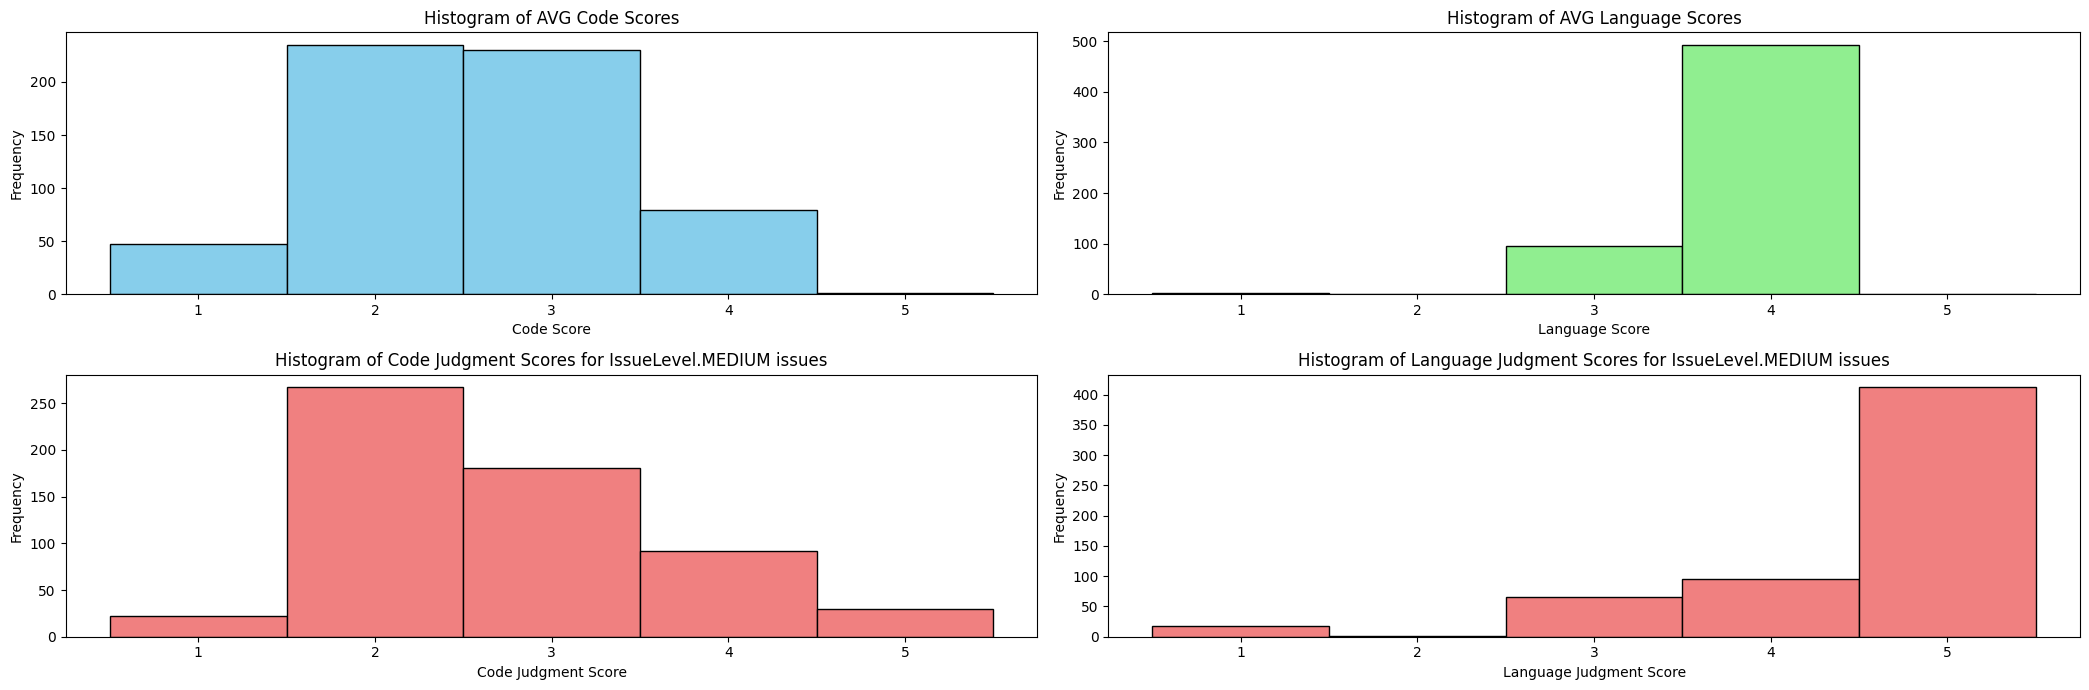

In [7]:
plot_histograms(df_reviews, ISSUE_LEVEL)


In [8]:
idx= 2
df_reviews.iloc[idx]["code_judgment_score"], df_reviews.iloc[idx]["code_judgment"]

(5.0,
 'The code in Turn 1 is correct but could be optimized, while the code in Turns 2 and 3 is without issues.')

In [9]:
df_reviews["avg_jdg_score"] = (df_reviews["code_judgment_score"] + df_reviews["lang_judgment_score"]) / 2
df_reviews.sort_values(by="avg_jdg_score", inplace=True, ascending=False)

In [10]:
df_reviews.tail()

,nb_path,code_score,lang_score,comb_feedback,code_feedback,lang_feedback,code_judgment,code_judgment_score,lang_judgment,lang_judgment_score,total_score,avg_jdg_score
338,1C7PSF9H1lzyH-ABrvPNl7meUQYjXq8Gz,2.000,4.000,#Turn 1:\n\n## Language(4/5):\nNone\n\n## Code...,#Turn 1:\n\n## Code(2/5):\n**Critical_Issues**...,#Turn 1:\n\n## Language(4/5):\nNone,The code has critical and medium issues relate...,2.0,The assistant's reply is not provided for revi...,1.0,6.00,1.5
322,1-g21Xsc2RslokoDJb91ARsGi-zTo7xHH,3.000,4.000,#Turn 1:\n\n## Language(4/5):\nNone\n\n## Code...,#Turn 1:\n\n## Code(3/5):\n**Critical_Issues**...,#Turn 1:\n\n## Language(4/5):\nNone,The code incorrectly changes the return type a...,2.0,The assistant's reply is not provided for revi...,1.0,7.00,1.5
492,1k5tJmaxA9y23ae-ixcEOxgBdL1kM5v_q,2.000,4.000,#Turn 1:\n\n## Language(4/5):\nNone\n\n## Code...,#Turn 1:\n\n## Code(2/5):\n**Critical_Issues**...,#Turn 1:\n\n## Language(4/5):\nNone,The code incorrectly assumes input types and d...,2.0,The assistant's reply is not available for rev...,1.0,6.00,1.5
520,1VFWe5HokgSrHKfd5voOhuIWTMoSmtAwM,3.000,4.000,#Turn 1:\n\n## Language(4/5):\nNone\n\n## Code...,#Turn 1:\n\n## Code(3/5):\n**Medium_Issues**\n...,#Turn 1:\n\n## Language(4/5):\nNone,The code fails to handle a specific edge case ...,2.0,The assistant's reply is not provided for revi...,1.0,7.00,1.5
213,1cQ2AzNY9P0rnE1HzlATsbZORhLmqqaHk,2.125,3.625,#Turn 1:\n\n## Language(1/5):\n**Medium_Issues...,#Turn 1:\n\n## Code(2/5):\n**Critical_Issues**...,#Turn 1:\n\n## Language(1/5):\n**Medium_Issues...,The code reviews indicate a range of issues fr...,2.0,The response is incomplete as it fails to prov...,1.0,5.75,1.5


In [11]:
df_reviews["task_link"] = df_reviews["nb_path"].apply(lambda x: f"https://colab.research.google.com/drive/{x}")

In [24]:
df_reviews.loc[492]

nb_path                                1k5tJmaxA9y23ae-ixcEOxgBdL1kM5v_q
code_score                                                           2.0
lang_score                                                           4.0
comb_feedback          #Turn 1:\n\n## Language(4/5):\nNone\n\n## Code...
code_feedback          #Turn 1:\n\n## Code(2/5):\n**Critical_Issues**...
lang_feedback                        #Turn 1:\n\n## Language(4/5):\nNone
code_judgment          The code incorrectly assumes input types and d...
code_judgment_score                                                  2.0
lang_judgment          The assistant's reply is not available for rev...
lang_judgment_score                                                  1.0
total_score                                                          6.0
avg_jdg_score                                                        1.5
task_link              https://colab.research.google.com/drive/1k5tJm...
Name: 492, dtype: object

In [25]:
print(df_reviews.loc[492]["code_feedback"])

#Turn 1:

## Code(2/5):
**Critical_Issues**
The function assumes the input vectors are NumPy arrays, but the function signature suggests they should be tuples.
**Medium_Issues**
The code does not handle the case where one or both vectors are zero vectors, which would cause a division by zero error.


In [26]:
df_reviews.loc[492]["lang_judgment"]

"The assistant's reply is not available for review, hence a judgment cannot be provided."

In [27]:
df_reviews.loc[492]["task_link"]

'https://colab.research.google.com/drive/1k5tJmaxA9y23ae-ixcEOxgBdL1kM5v_q'

In [28]:
df_gpt_reviews = df_reviews[['task_link', 'code_feedback', 'lang_feedback', 'code_judgment', 'lang_judgment', 'avg_jdg_score']]
df_gpt_reviews.to_csv('gpt_reviews.csv', index=False)

In [29]:
df_gpt_reviews["avg_jdg_score"].describe()

count    592.000000
mean       3.613176
std        0.714743
min        1.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: avg_jdg_score, dtype: float64

In [32]:
df_gpt_reviews[df_gpt_reviews["avg_jdg_score"]<=2.5].shape

(74, 6)